# Taller 1 - Ciencia de datos aplicada
---
Camilo Andres Morillo Cervantes (202015224)

Analisis de datos de Airbnb en la ciudad de Barcelona, España

## 1) Entendimiento inicial de datos

In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [5]:
#Cargar datos
reviews = pd.read_csv('./reviews.csv', encoding='latin-1')
calendar = pd.read_csv('./calendar.csv', encoding='latin-1')
listings = pd.read_csv('./listings.csv', encoding='latin-1')
neighbourhoods = pd.read_csv('./neighbourhoods.csv', encoding='latin-1')

In [6]:
#Mostrar las dimensiones del dataset
print("Listing data shape:", listings.shape)
print("Calendar data shape:", calendar.shape)
print("Reviews data shape:",reviews.shape)
print("Neighbourhoods data shape:",neighbourhoods.shape)

Listing data shape: (19482, 75)
Calendar data shape: (7110934, 7)
Reviews data shape: (927474, 6)
Neighbourhoods data shape: (73, 2)


In [7]:
# Tipos de datos del dataset
print("Listing data types:\n\n", listings.dtypes,"\n\n")
print("Calendar data types:\n\n", calendar.dtypes,"\n\n")
print("Reviews data types:\n\n", reviews.dtypes,"\n\n")
print("Neighbourhoods data types:\n\n", neighbourhoods.dtypes,"\n\n")

Listing data types:

 id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate      

Dado que el objetivo es ayudar a individuos o empresas que buscan invertir en propiedades para alquiler a través de la plataforma AirBnb, los atributos mas importantes seran aquellos que ayuden al cliente a determinar que tan buena es la inversion en las propiedades. El top 5 de los atributos más importantes para dicho objetivo son:

- accomodates: La capacidad maxima de la propiedad.
- price: Precio diario en la moneda local
- number_of_reviews: Numero de reviews que tiene la propiedad.
- review_scores_rating: Rating de la propiedad.
- availability_365: La disponibilidad del lugar durante el proximo año.

In [11]:
top_five = ['accommodates', 'price', 'number_of_reviews', 'review_scores_rating', 'availability_365']

In [14]:
# Convertir la columna price en datos tipo float
listings['price'] = listings['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [16]:
# Estadisticas
print(listings[top_five].describe())

       accommodates         price  number_of_reviews  review_scores_rating  \
count  19482.000000  15422.000000       19482.000000          14731.000000   
mean       3.335130    168.633575          47.606714              4.587361   
std        2.159339    262.686362          99.350461              0.506437   
min        1.000000      8.000000           0.000000              1.000000   
25%        2.000000     66.000000           1.000000              4.460000   
50%        3.000000    128.000000           7.000000              4.700000   
75%        4.000000    212.000000          48.000000              4.910000   
max       16.000000   9999.000000        2453.000000              5.000000   

       availability_365  
count      19482.000000  
mean         177.206704  
std          125.322884  
min            0.000000  
25%           59.000000  
50%          183.000000  
75%          300.000000  
max          365.000000  


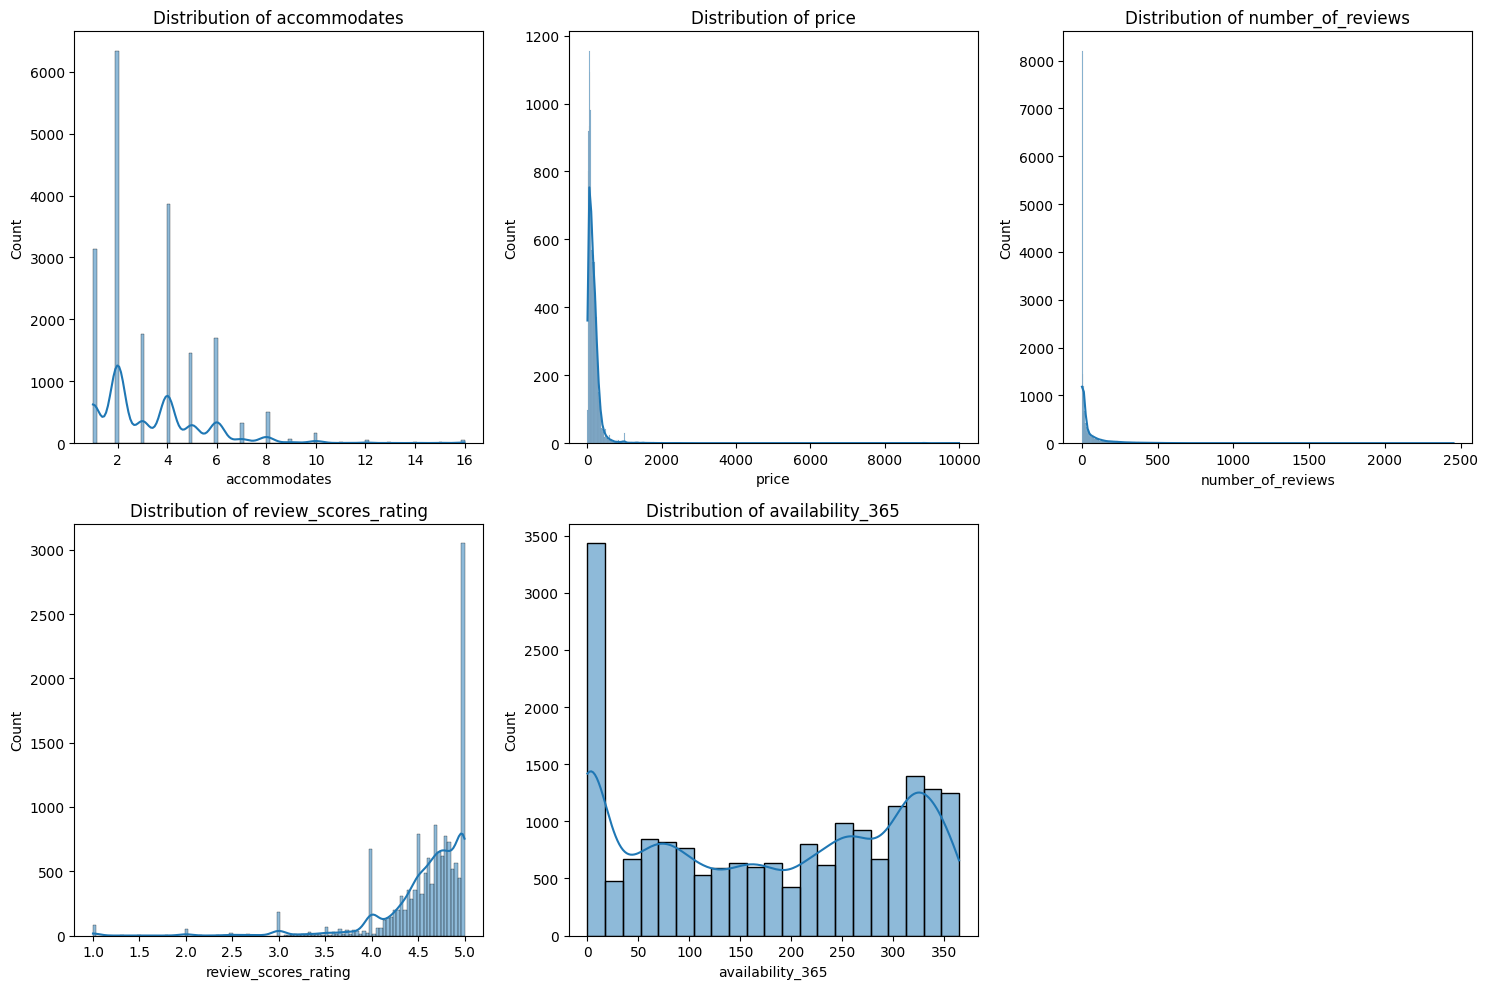

In [17]:
# Distribucion
plt.figure(figsize=(15, 10))

for i, col in enumerate(top_five):
    plt.subplot(2, 3, i+1)
    sns.histplot(listings[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

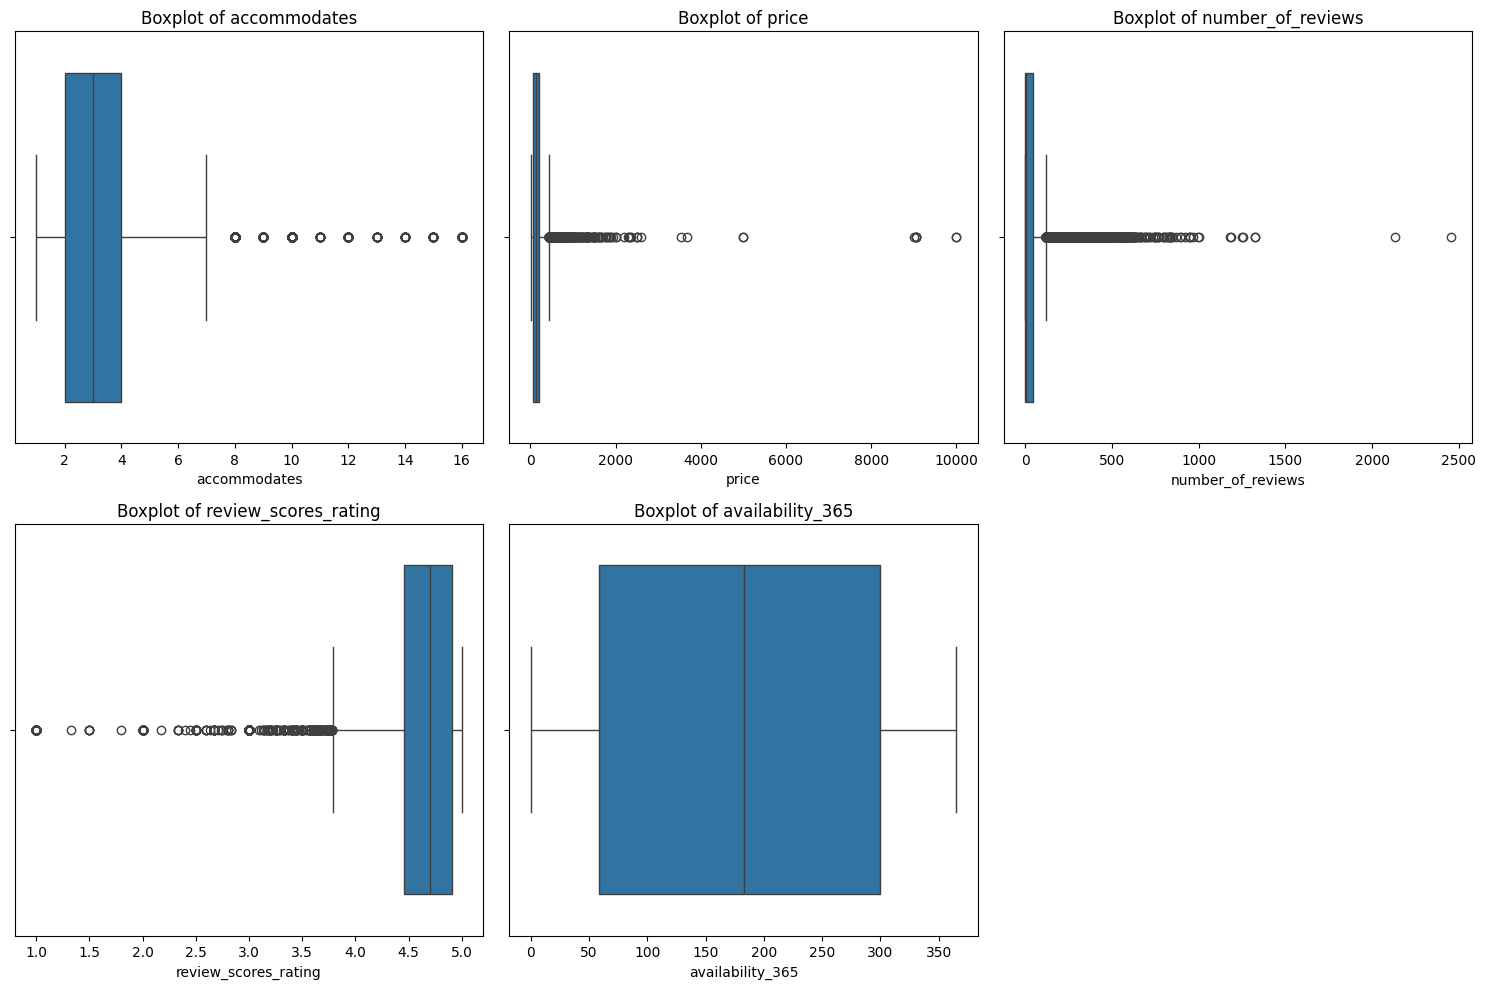

In [18]:
# Boxplots
plt.figure(figsize=(15, 10))

for i, col in enumerate(top_five):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=listings[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

## 2) Estrategia de Analisis


La estrategia de análisis se centrará en comprender los factores que afectan la rentabilidad y ocupación de las propiedades en Airbnb, utilizando estadísticas descriptivas y técnicas gráficas. Inicialmente, calcularemos medidas como la media, mediana, y rango intercuartílico para variables clave como el precio por noche, número de reseñas, calificaciones, y disponibilidad. Esto nos permitirá identificar tendencias generales del mercado y posibles valores atípicos que influyen en el rendimiento de las propiedades.

Luego, emplearemos visualizaciones como mapas de calor para analizar la relación entre la ubicación geográfica y la disponibilidad, y gráficos de dispersión para explorar cómo se relacionan atributos como precio y calificaciones con la ocupación. También realizaremos análisis de correlación entre variables como la calidad de la propiedad, el precio, y las reseñas, con el fin de identificar qué características están más asociadas con una mayor tasa de ocupación. Estas herramientas ayudarán a identificar los sectores más rentables y las características más demandadas en las propiedades, proporcionando a los inversores una visión clara de las mejores oportunidades.

# 3) Desarrollo de la estrategia

In [19]:
# Limpieza y procesamiento de datos considerando nulos

# Transformar el precio a float (remover $ y comas)
listings['price'] = listings['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Convertir columnas de fechas a tipo datetime
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'], errors='coerce')
listings['host_since'] = pd.to_datetime(listings['host_since'], errors='coerce')
listings['first_review'] = pd.to_datetime(listings['first_review'], errors='coerce')
listings['last_review'] = pd.to_datetime(listings['last_review'], errors='coerce')

# Transformar columnas booleanas y llenar nulos
listings['host_is_superhost'] = listings['host_is_superhost'].map({'t': 1, 'f': 0}).fillna(0)
listings['has_availability'] = listings['has_availability'].map({'t': 1, 'f': 0}).fillna(0)
listings['instant_bookable'] = listings['instant_bookable'].map({'t': 1, 'f': 0}).fillna(0)

# Manejo de valores nulos en columnas numéricas
listings['price'] = listings['price'].fillna(listings['price'].median())
listings['review_scores_rating'] = listings['review_scores_rating'].fillna(listings['review_scores_rating'].median())

In [20]:
# Verificamos los datos después del procesamiento
print(listings[['price', 'last_scraped', 'host_since', 'first_review', 'host_is_superhost']].head())

   price last_scraped host_since first_review  host_is_superhost
0  194.0   2024-09-06 2010-01-19   2013-05-27                0.0
1  304.0   2024-09-06 2010-03-09   2011-03-15                1.0
2  211.0   2024-09-06 2010-05-31   2011-07-17                0.0
3  300.0   2024-09-06 2010-01-24   2010-07-10                0.0
4  314.0   2024-09-06 2010-01-24   2010-10-03                0.0


In [22]:
# Cálculo de estadísticos descriptivos
desc_stats = listings[top_five].describe()
print(desc_stats)

       accommodates         price  number_of_reviews  review_scores_rating  \
count  19482.000000  19482.000000       19482.000000          19482.000000   
mean       3.335130    160.165640          47.606714              4.614830   
std        2.159339    234.297867          99.350461              0.443022   
min        1.000000      8.000000           0.000000              1.000000   
25%        2.000000     76.000000           1.000000              4.540000   
50%        3.000000    128.000000           7.000000              4.700000   
75%        4.000000    189.000000          48.000000              4.837500   
max       16.000000   9999.000000        2453.000000              5.000000   

       availability_365  
count      19482.000000  
mean         177.206704  
std          125.322884  
min            0.000000  
25%           59.000000  
50%          183.000000  
75%          300.000000  
max          365.000000  


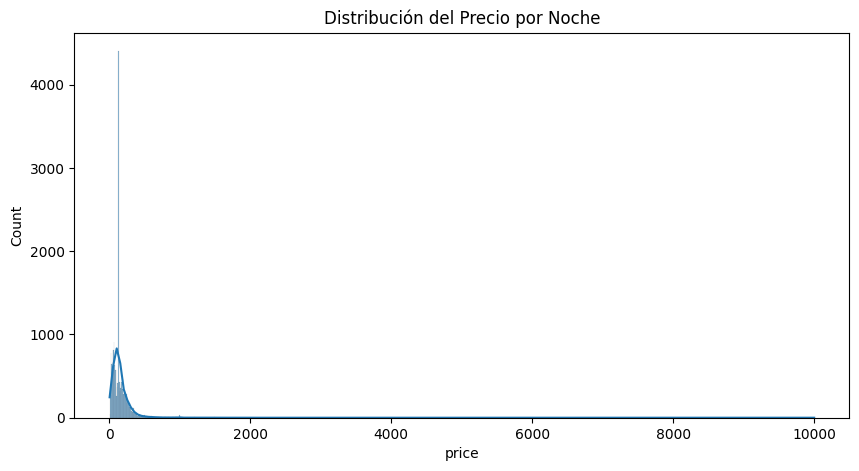

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(listings['price'].dropna(), kde=True)
plt.title('Distribución del precio por noche')
plt.show()

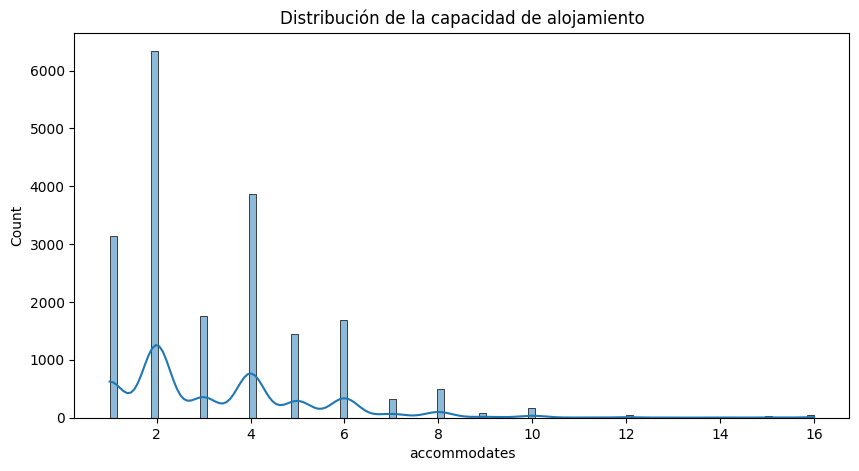

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(listings['accommodates'].dropna(), kde=True)
plt.title('Distribución de la capacidad de alojamiento')
plt.show()

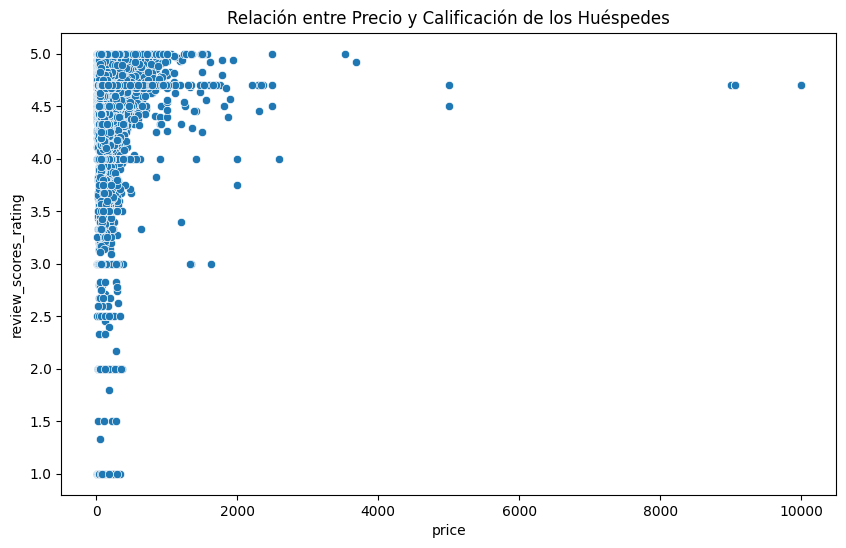

In [26]:
# Gráfico de dispersión entre precio y calificación
plt.figure(figsize=(10, 6))
sns.scatterplot(data=listings.dropna(subset=['price', 'review_scores_rating']),
                x='price', y='review_scores_rating')
plt.title('Relación entre Precio y Calificación de los Huéspedes')
plt.show()

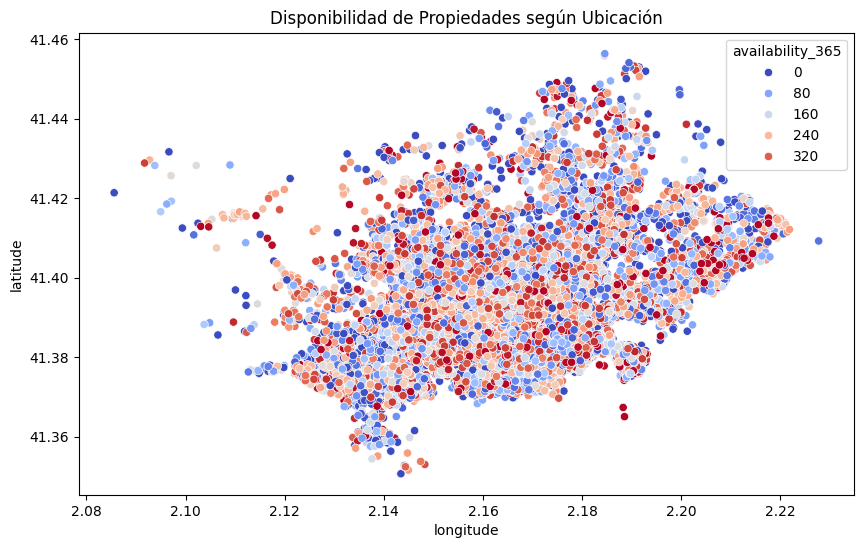

In [27]:
# Mapa de calor utilizando latitud y longitud para representar disponibilidad
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='availability_365',
                data=listings.dropna(subset=['latitude', 'longitude', 'availability_365']), palette='coolwarm')
plt.title('Disponibilidad de Propiedades según Ubicación')
plt.show()

### Insights Extraidos

- **Distribución del precio:** El gráfico de distribución del precio muestra que la mayoría de las propiedades tienen precios accesibles, aunque existen algunas propiedades con precios significativamente más altos, lo que podría estar relacionado con su ubicación o comodidades.

- **Capacidad de alojamiento:** La capacidad de alojamiento se concentra principalmente en propiedades que albergan entre 2 y 4 personas, sugiriendo un enfoque en viajeros pequeños o parejas.

- **Relación precio-calificación:** A partir del gráfico de dispersión, observamos que propiedades más caras no necesariamente tienen mejores calificaciones, lo que indica que la relación entre precio y satisfacción del cliente no es lineal. Factores como la ubicación o la calidad del servicio pueden tener un impacto más significativo en la satisfacción.

- **Disponibilidad por ubicación:** El mapa de calor revela que la disponibilidad de las propiedades varía según la ubicación. Las propiedades más disponibles se encuentran en áreas específicas, lo que sugiere menor demanda en esas zonas. Esto puede ser una señal para invertir en propiedades donde la disponibilidad es más baja, lo que indicaría mayor ocupación y potencial rentabilidad.